In [1]:
from eiscirc import ImpedanceModel
import numpy as np
import matplotlib.pyplot as plt

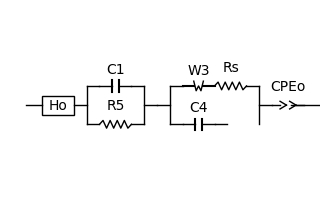

['Ho', 'R5', 'C1', 'C4', 'W3', 'Rs', 'CPEo']

In [2]:
model = ImpedanceModel("Ho-R5//C1-C4//(W3-Rs)-CPEo")
fig = model.draw_circuit(size=(4, 3))
plt.show()
model.param_names
#model.Z_imag

C:\Users\mlp\My Projects\github\eiscirc\eiscirc\circuit_parser.py:208: RuntimeWarning: overflow encountered in tanh
  return lambda omega, **params: params[structure][0] * np.tanh( params[structure][1] * np.sqrt(1j * omega) ) / np.sqrt(1j * omega)


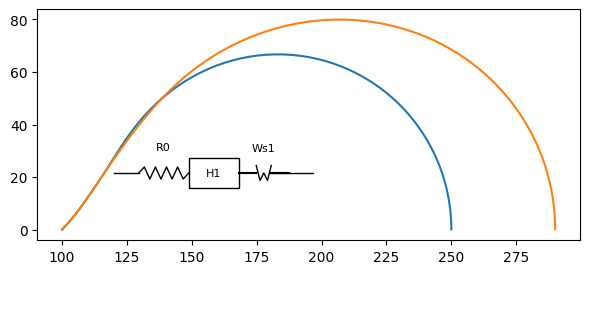

In [3]:
model = ImpedanceModel("R0-H1-Ws1")
omega = 2 * np.pi * np.logspace(-3, 8, 1000)  # 10 Hz to 1 MHz in rad/s
model.set_params(
    R0=100,
    H1=(50, 0.1, 1),  # Havránek: R, tau, alpha
    Ws1=(200, 0.5)      # Finite Warburg: R, tau
)

fig, ax = plt.subplots(figsize=(7, 3))
# Add circuit as inset
model.draw_circuit(ax=ax,position=[3, 3], loc = 2)

Z = model.impedance(omega)
ax.plot(model.Z_real, -model.Z_imag)

model.params.Ws1.tau = 0.7
#model.set_params(Ws1={"tau":0.7})
#model.set_params(Ws1=(100.,0.5))
#model.set_params(Ws1_tau=0.7)

#model.set_params(**{'Ws1.tau': 0.7}) #### DOES NOT WORK
#model.set_params(Ws1.tau=0.7) #### DOES NOT WORK

Z = model.impedance(omega)
ax.plot(model.Z_real, -model.Z_imag)


C:\Users\mlp\AppData\Local\Temp\ipykernel_12100\3223292725.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


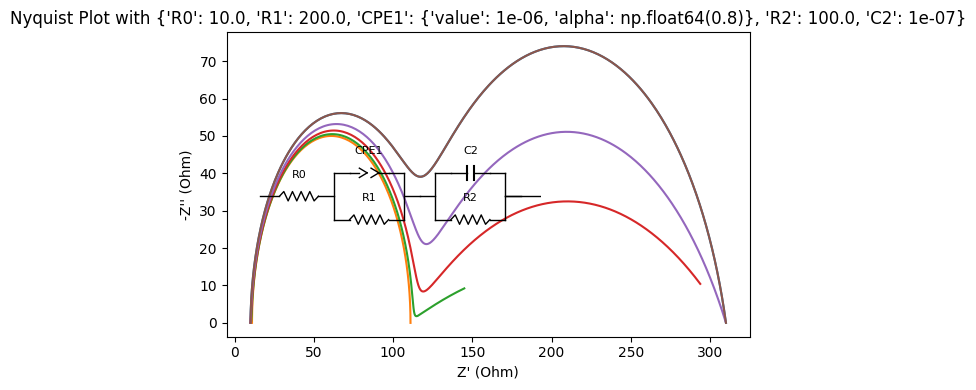

In [ ]:
model = ImpedanceModel("R0-R1//CPE1-R2//C2")
omega = 2 * np.pi * np.logspace(-3, 8, 1000)  # 10 Hz to 1 MHz in rad/s

### Keyword input
Z = model.impedance(omega, R0=1e1, R1=2e2, CPE1=(1e-6,0.8), R2=1e2, C2=1e-7)

R0=1e1; R1=2e2; CPE1=(1e-6,0.8); R2=1e2; C2=1e-7
#### Array input
Z = model.impedance(omega, [R0, R1, CPE1, R2, C2])

#### Dictionary input
params = {'R0':R0, 'R1':R1, 'C2':C2, 'CPE1':CPE1, "R2":R2}
Z = model.impedance(omega, params)

fig, ax = plt.subplots(figsize=(6, 4))
# Add circuit as inset
model.draw_circuit(ax=ax,position=[3, 3], loc = 2)

ax.plot(model.Z_real, -model.Z_imag)

for x in np.arange(0,1,0.2):

    #model.params.CPE1.alpha=x
    #model.params.CPE1_alpha=x
    #model.set_params(CPE1_alpha=x)
    #model.set_params(CPE1={"alpha":x})
    #model.set_params(CPE1=(1e-6,x))

    Z = model.impedance(omega)
    ax.plot(model.Z_real, -model.Z_imag)

ax.set_xlabel('Z\' (Ohm)')
ax.set_ylabel('-Z\'\' (Ohm)')
ax.set_title('Nyquist Plot with %s'%(model._params))
plt.tight_layout()
plt.show()

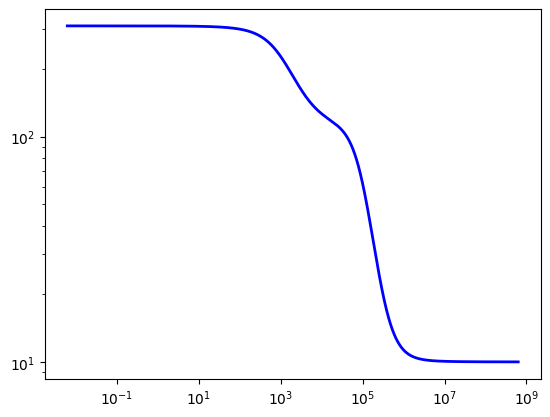

In [6]:
plt.loglog(omega, model.Z_real, 'b-', linewidth=2)